In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Function get_data

In [2]:
url = '/home/pablo/code/age_gender_jagonzalezj/age_gender/age_gender.csv'
df = pd.read_csv(url)

In [3]:
df.head(5)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


# Data exploration

## Récuperer les images à partir des pixels et les stocker dans un dossier

In [4]:
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10)

<Figure size 864x360 with 0 Axes>

In [5]:
import os
import os.path
import csv
from PIL import Image


# Ethnicity labels
ETHNICITIES = { 
    0: "White", 
    1: "Black",
    2: "Asian",
    3: "Indian",
    4: "Hispanic"
}

# Gender labels
GENDERS = { 
    0: "Male", 
    1: "Female"
}


# Directory to store the images
base_path = os.path.join(os.path.curdir, 'images')
labeled_paths = {}
if not os.path.isdir(base_path):
    os.makedirs(base_path)

# Sort images in directories by ethnicity then gender
for ek, ev in ETHNICITIES.items():
    for gk, gv in GENDERS.items():
        labeled_path = os.path.join(base_path, ev, gv)
        labeled_paths.setdefault(ek,{})[gk] = labeled_path
        if not os.path.isdir(labeled_path):
            os.makedirs(labeled_path)


with open(url,"r") as fp:
    # Read dataset as dict entries
    csv_reader = csv.DictReader(fp)

    for row in csv_reader:
        age = int(row['age'])
        ethnicity = int(row['ethnicity'])
        gender = int(row['gender'])

        # Extract pixel string (string list of grayscale integers sep by space)
        pixels = bytearray([int(px) for px in row['pixels'].split(' ')])

        # Create new Image of resolution 48*48 from pixels
        #   I assumed a square image, so I computed
        #     len(pixels)**.5  # = 48.0
        #   to get the resolution.
        img = Image.frombytes('L', (48,48), bytes(pixels))

        # Name of file to write to
        #file_name = row['img_name']
        # or name file with labels: age_ethnicity_gender-original.jpg
        file_name = f"{age:03}_{ethnicity}_{gender}-{row['img_name'].split('.')[0]}.jpg"

        # The path to save the image to
        file_dir = labeled_paths.get(ethnicity, {}).get(gender, base_path)
        file_path = os.path.join(file_dir, file_name)

        # Write out the Image file
        img.save(file_path)
        # or save without JPEG compression
        #img.save(file_path + ".png", 'png', compress_level=0)

## add labels

In [6]:
df['gender'] = df['gender'].map({0: "Male", 
                                 1: "Female"
                                })

df['ethnicity'] = df['ethnicity'].map({ 
                                        0: "White", 
                                        1: "Black",
                                        2: "Asian",
                                        3: "Indian",
                                        4: "Hispanic"
                                    })

In [7]:
df

,age,ethnicity,gender,img_name,pixels
0,1,Asian,Male,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,Asian,Male,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,Asian,Male,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,Asian,Male,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,Asian,Male,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,White,Female,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,Black,Female,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,Asian,Female,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,Asian,Female,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


## explore the dataset

In [31]:
X = np.array(df['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)

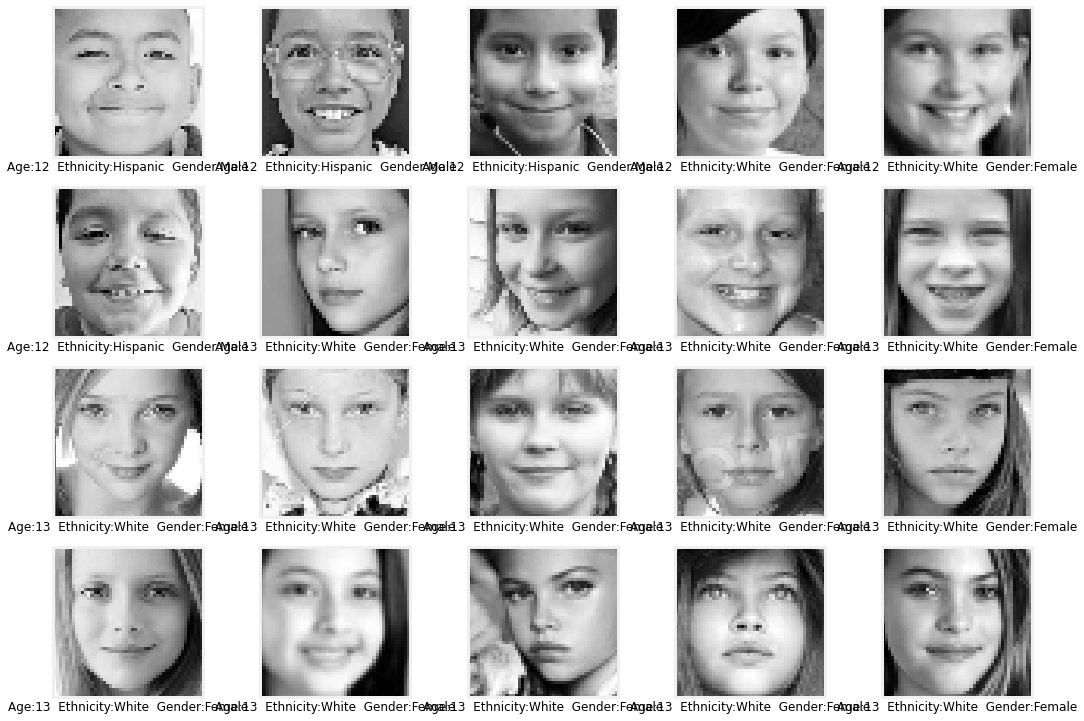

In [46]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48),"gray")
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

## describe/info gender feature

In [34]:
df['gender'].describe()

count     23705
unique        2
top        Male
freq      12391
Name: gender, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  object
 2   gender     23705 non-null  object
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(1), object(4)
memory usage: 926.1+ KB


## count the gender 

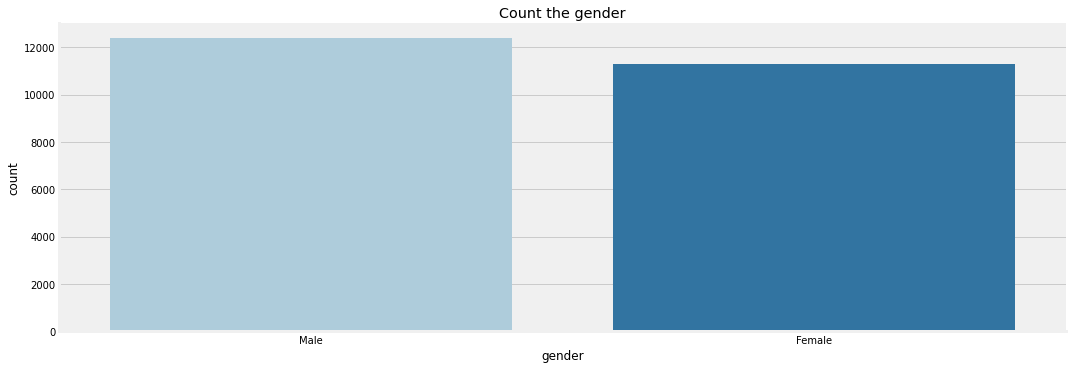

In [36]:
sns.catplot(x="gender", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.title('Count the gender');
plt.show()

## count ethinicties

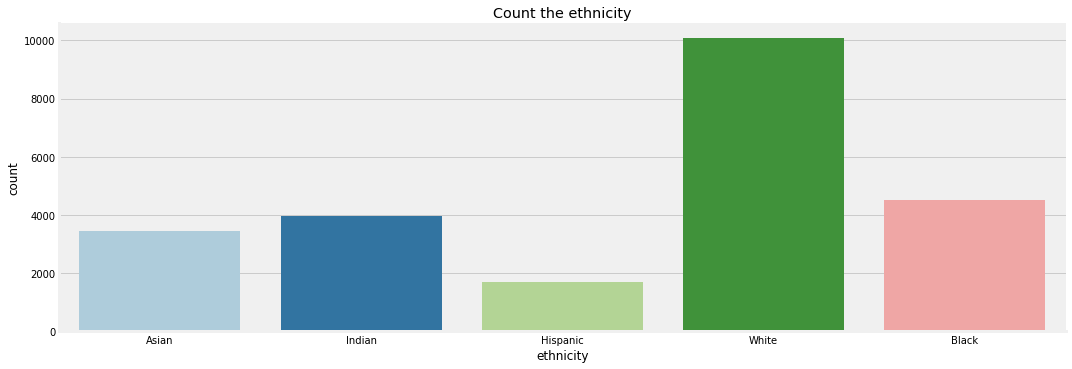

In [37]:
sns.catplot(x="ethnicity", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.title('Count the ethnicity');
plt.show()

# Evaluation metrics

##  Precision

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Others metrics for information : Recall and F1

# Baseline Model 

In [39]:
from sklearn.dummy import DummyClassifier

In [40]:
X = df.drop('gender', axis=1)
y = df['gender']

In [41]:
X

,age,ethnicity,img_name,pixels
0,1,Asian,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,Asian,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,Asian,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,Asian,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,Asian,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
...,...,...,...,...
23700,99,White,20170120221920654.jpg.chip.jpg,"[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9..."
23701,99,Black,20170120134639935.jpg.chip.jpg,"[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85...."
23702,99,Asian,20170110182418864.jpg.chip.jpg,"[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101..."
23703,99,Asian,20170117195405372.jpg.chip.jpg,"[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140...."


In [42]:
y

0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
23700    Female
23701    Female
23702    Female
23703    Female
23704    Female
Name: gender, Length: 23705, dtype: object

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
baseline_model = DummyClassifier(strategy="prior") # Baseline : predict method always returns the most frequent class label in the observed y argument passed to fit
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

0.5260123734533183

# First Model 